# Libraries:

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.datasets import load_wine

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Importing Dataset:

In [9]:
df = load_wine()

In [10]:
df

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [11]:
x = pd.DataFrame(df['data'])

In [12]:
len(x)

178

In [13]:
x['id'] = list(range(0, len(x)))

In [14]:
x.columns = ['alcohol',
  'malic_acid',
  'ash',
  'alcalinity_of_ash',
  'magnesium',
  'total_phenols',
  'flavanoids',
  'nonflavanoid_phenols',
  'proanthocyanins',
  'color_intensity',
  'hue',
  'od280/od315_of_diluted_wines',
  'proline', 'id']

In [15]:
x

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,id
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,2
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,3
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,173
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,174
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,175
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,176


In [16]:
y = pd.DataFrame(df['target'])

In [17]:
y['id'] = list(range(0, len(x)))

In [18]:
y.columns = ['Class', 'id_2']

In [19]:
y

,Class,id_2
0,0,0
1,0,1
2,0,2
3,0,3
4,0,4
...,...,...
173,2,173
174,2,174
175,2,175
176,2,176


# EDA:

In [20]:
df = y.join(x, on='id_2', how='inner')

In [21]:
df.sample(3)

,Class,id_2,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,id
69,1,69,12.21,1.19,1.75,16.8,151.0,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718.0,69
105,1,105,12.42,2.55,2.27,22.0,90.0,1.68,1.84,0.66,1.42,2.70,0.86,3.30,315.0,105
80,1,80,12.00,0.92,2.00,19.0,86.0,2.42,2.26,0.30,1.43,2.50,1.38,3.12,278.0,80


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int32  
 1   id_2                          178 non-null    int64  
 2   alcohol                       178 non-null    float64
 3   malic_acid                    178 non-null    float64
 4   ash                           178 non-null    float64
 5   alcalinity_of_ash             178 non-null    float64
 6   magnesium                     178 non-null    float64
 7   total_phenols                 178 non-null    float64
 8   flavanoids                    178 non-null    float64
 9   nonflavanoid_phenols          178 non-null    float64
 10  proanthocyanins               178 non-null    float64
 11  color_intensity               178 non-null    float64
 12  hue                           178 non-null    float64
 13  od280

In [23]:
df[df.duplicated()] # no duplicate found

,Class,id_2,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,id


In [24]:
df = df.drop(['id_2', 'id'], axis=1)

In [25]:
df.head(5)

,Class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [26]:
df.Class.value_counts()

Class
1    71
0    59
2    48
Name: count, dtype: int64

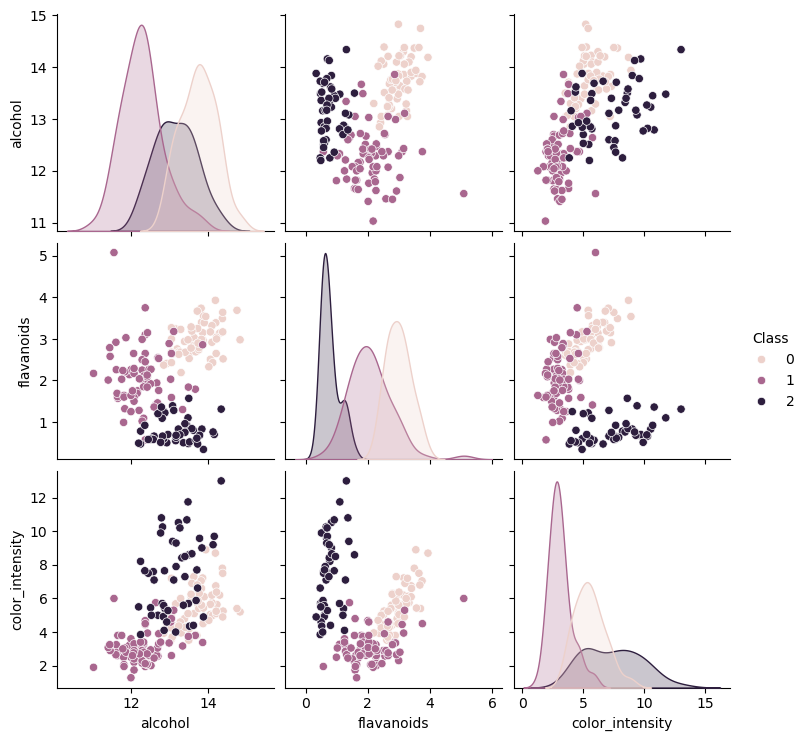

In [27]:
sns.pairplot(df[['alcohol','flavanoids', 'color_intensity', 'Class']], hue="Class")

# Training and testing (ML)

In [28]:
x = x.drop('id', axis=1)

In [29]:
y = y.drop('id_2', axis=1)

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, test_size=0.25, random_state=32, shuffle=True)

In [31]:
x_train[:5]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
13,14.75,1.73,2.39,11.4,91.0,3.10,3.69,0.43,2.81,5.40,1.25,2.73,1150.0
16,14.30,1.92,2.72,20.0,120.0,2.80,3.14,0.33,1.97,6.20,1.07,2.65,1280.0
164,13.78,2.76,2.30,22.0,90.0,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615.0
33,13.76,1.53,2.70,19.5,132.0,2.95,2.74,0.50,1.35,5.40,1.25,3.00,1235.0
129,12.04,4.30,2.38,22.0,80.0,2.10,1.75,0.42,1.35,2.60,0.79,2.57,580.0


In [32]:
x_test[:5]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
103,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0
93,12.29,2.83,2.22,18.0,88.0,2.45,2.25,0.25,1.99,2.15,1.15,3.30,290.0
44,13.05,1.77,2.10,17.0,107.0,3.00,3.00,0.28,2.03,5.04,0.88,3.35,885.0
161,13.69,3.26,2.54,20.0,107.0,1.83,0.56,0.50,0.80,5.88,0.96,1.82,680.0
160,12.36,3.83,2.38,21.0,88.0,2.30,0.92,0.50,1.04,7.65,0.56,1.58,520.0


In [33]:
mnb = MultinomialNB()

In [34]:
gnb = GaussianNB()

In [35]:
mnb.fit(x_train, y_train)

C:\Users\abdul\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [36]:
gnb.fit(x_train, y_train)

C:\Users\abdul\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [37]:
y_pred_mnb = mnb.predict(x_test)

In [38]:
y_pred_gnb = gnb.predict(x_test)

In [39]:
y_pred_mnb

array([1, 1, 0, 2, 2, 0, 0, 2, 0, 0, 1, 2, 0, 2, 0, 1, 1, 1, 0, 0, 1, 0,
       2, 0, 1, 2, 0, 1, 0, 0, 1, 0, 2, 1, 1, 1, 2, 0, 1, 2, 0, 1, 2, 2,
       0])

In [40]:
y_pred_gnb

array([1, 1, 0, 2, 2, 0, 0, 2, 0, 0, 1, 2, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2,
       2, 2, 1, 2, 0, 0, 0, 0, 2, 0, 2, 1, 0, 1, 2, 0, 2, 2, 0, 1, 2, 2,
       0])

<AxesSubplot:title={'center':'Confusion Matrix of Multinominal Bayes'}>

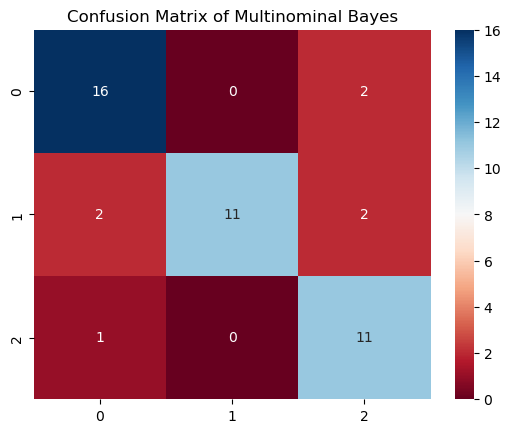

In [41]:
plt.title('Confusion Matrix of Multinominal Bayes')
sns.heatmap(confusion_matrix(y_pred_mnb, y_test), cmap='RdBu', annot=True)

<AxesSubplot:title={'center':'Confusion Matrix of Gaussian Bayes'}>

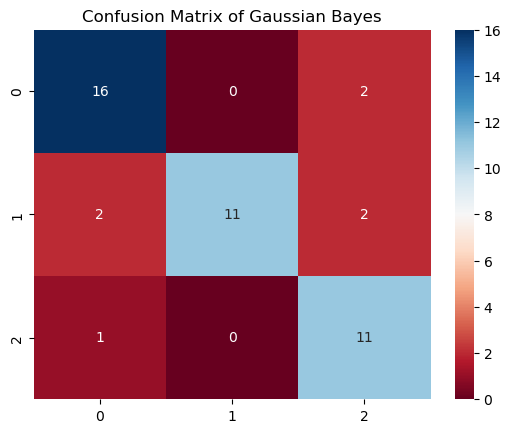

In [42]:
plt.title('Confusion Matrix of Gaussian Bayes')
sns.heatmap(confusion_matrix(y_pred_mnb, y_test), cmap='RdBu', annot=True)

In [43]:
accuracy_scores = [
    {'Model': 'Multinominal Bayes', 'Accuracy Score': accuracy_score(y_test, y_pred_mnb)},
    {'Model': 'Gaussian Bayes', 'Accuracy Score': accuracy_score(y_test, y_pred_gnb)}
]

accuracy_df = pd.DataFrame(accuracy_scores).sort_values(by='Accuracy Score', ascending=False)
accuracy_df.head()

,Model,Accuracy Score
1,Gaussian Bayes,0.977778
0,Multinominal Bayes,0.844444


<AxesSubplot:xlabel='Accuracy Score', ylabel='Model'>

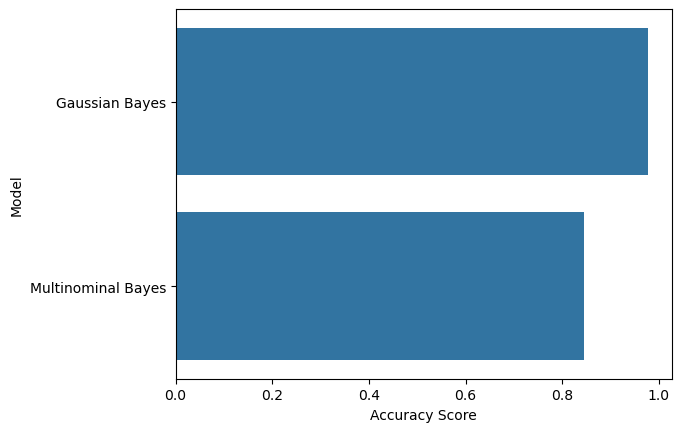

In [44]:
sns.barplot(data=accuracy_df, x='Accuracy Score', y='Model')

In [45]:
test_value =  [[13.5, 1.5, 2.3, 15.5, 95, 2.5, 1.1, 0.4, 1.3, 4.8, 0.9, 2.6, 2.1]]

In [46]:
print(f'Your predicted class of wine is found out to be: Class_{mnb.predict(test_value)[0]}')

Your predicted class of wine is found out to be: Class_1


C:\Users\abdul\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


In [47]:
print(f'Your predicted class of wine is found out to be: Class_{gnb.predict(test_value)[0]}')

Your predicted class of wine is found out to be: Class_1


C:\Users\abdul\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


# Conclusion

Throughout the analysis, Gaussian Naive Bayes demonstrated superior performance with an accuracy score of approximately 98%, compared to 84.4% for Multinomial Naive Bayes in predicting wine quality classes. However, it's important to note that both models predicted all classes the same and produced identical confusion matrices. Despite the higher accuracy, Gaussian Naive Bayes is still considered the better option for future predictions in this context due to its overall reliability.

In [48]:
# Done